### Twitter Analysis of Corona virus in May

In [1]:
import pandas as pd
import tweepy
import json
import csv
import os
import gender_guesser.detector as gender
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading in the CSV File
df = pd.read_csv (r'twitter_outputCoronaVirus.csv')
df.columns = ['hashtags','id','text','name', 'user', 'user_loc', 'user_desc', 'user_followers', 'user_friend', 'user_listed', 'user_created', 'user_favs','user_statuses']
print (df)

                                                hashtags                   id  \
0                                                     []  1238164029656444928   
1                   ['Italy', 'France', 'Denmark', 'UK']  1238164029895512064   
2      ['COVID19', 'CoronavirusPandemic', 'coronaviru...  1238164029903908864   
3                                                     []  1238164030025535488   
4                         ['NehaDhupia', 'fakefeminism']  1238164030067339266   
5      ['CoronavirusPandemic', 'Covid_19', 'lockdown'...  1238164030000373761   
6                               ['Trumpspeech', 'COVID']  1238164030038192131   
7                                                     []  1238164030130401286   
8                                            ['COVID19']  1238164029987831811   
9                                            ['COVID19']  1238164030080122882   
10                                          ['Covid_19']  1238164030293934080   
11                          

## Which gender is Tweeting?

In [3]:
detector = gender.Detector()
gender_predictions = []
for name in df['name']:
    genderPrediction = detector.get_gender(name)
    gender_predictions.append(genderPrediction)

df['GenderPrediction'] = gender_predictions
print(df['GenderPrediction'].value_counts())

unknown          35337
female            1056
male               967
mostly_female      120
mostly_male        118
andy                66
Name: GenderPrediction, dtype: int64


##### Analysis:
1056 females have tweeted about Corona in May in comparison to 967 male.

## Word Map!

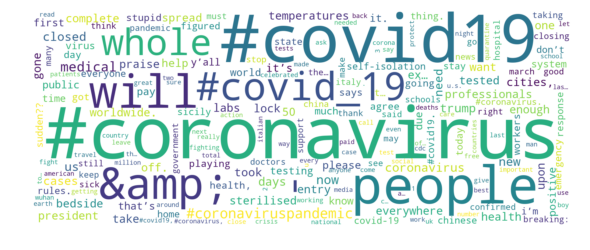

In [4]:
from collections import Counter
words = []
for tweet in df['text']:
    tweet = str(tweet).lower() # Convert to string
    tweets = [i  for i in tweet.split()] # Grab individual tags
    for word in tweets: # Loop through all potential tags
        if word != "":
            words.append(word) # Add a tag if it's not empty
            
word_map = Counter(words) # Variable that holds all hashtag counts
handles=[]
links=[]
company_name=[]
for key in word_map:
    if '@' in key:
        handles.append(key)
    elif 'https' in key:
        links.append(key)
stopwords = set(STOPWORDS)
stopwords.update(["rt"])
stopwords.update(handles)
stopwords.update(links)
stopwords.update(company_name)
delete=[key for key in word_map if key in stopwords]
for key in delete:
    del word_map[key]
wordcloud = WordCloud(stopwords=stopwords, width = 2000, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(word_map)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

##### Analysis:
In March, during the pandemic, most of the world was taken back by how quickly the virus transformed daily life. Examples can be seen with words such as, "new", "cases", "tested", "italian", "self-isolation". Information surrounding the virus was extremely unknown and limited.

### Tweets based on location:

In [5]:
print(df['user_loc'].value_counts())

United States                                 575
London, England                               249
California, USA                               232
USA                                           202
New York, NY                                  201
Los Angeles, CA                               198
Washington, DC                                192
Florida, USA                                  167
London                                        163
Canada                                        157
Texas, USA                                    154
Chicago, IL                                   146
India                                         136
United Kingdom                                132
Houston, TX                                   121
Lagos, Nigeria                                115
Boston, MA                                    115
Nigeria                                       114
Toronto, Ontario                              111
New York, USA                                 110


##### Analysis: 
Most popular region collected is the United States followed by the United Kingdom and then Canada.

### Tweets based on Hashtag function:

In [6]:
print(df['hashtags'].value_counts())

[]                                                                                                  17396
['coronavirus']                                                                                      3606
['COVID19']                                                                                          3560
['Covid_19']                                                                                         1177
['Coronavirus']                                                                                       995
['CoronavirusPandemic']                                                                               557
['COVID19', 'CoronavirusPandemic']                                                                    548
['CoronaVirus']                                                                                       352
['Covid19']                                                                                           265
['COVIDー19']                                  

#### Analysis of most popular hashtag collected in order: 
'coronavirus', 'COVID19', and  'Covid_19'. Total number of tweets with these hastags respectively: 3606, 3560, and 1177.

### How many of the tweets collected were RETweets?

In [7]:
import re
dfnumpy= df['text'].to_string()
regex = r'[^R-R][T-T]+.{2,}'
print(len(re.compile(regex).findall(dfnumpy)))

11941


##### Analysis:
11941 tweets collected of the total 30,000+ tweets were RETweets.

## Using a sentiment analysis to determine whether the tweets were positive or negative:

In [8]:
polarity_score = []
subjectivity_score = []
for text in df['text']:
    blob = TextBlob(text)
    polarity_score.append(blob.sentiment.polarity)
    subjectivity_score.append(blob.sentiment.subjectivity)
    
df['PolarityScore'] = polarity_score
df['SubjectivityScore'] = subjectivity_score

In [9]:
#Personal Analysis
def create_column(data):
    if data <= -0.5:
        grouping = 'Strong-Negative'
    elif data > -0.5 and data < 0.0:
        grouping = 'Mild-Negative'  
    elif data > 0.0 and data < 0.5:
        grouping = 'Mild Positive'
    elif data >=0.5:
        grouping = 'Strong-Positive'
    else:
        grouping = 'Neutral'
    return grouping

df['sentimentLabel'] = df['PolarityScore'].apply(create_column)

Text(0.5,1,'Sentiment by Gender for Sentiment')

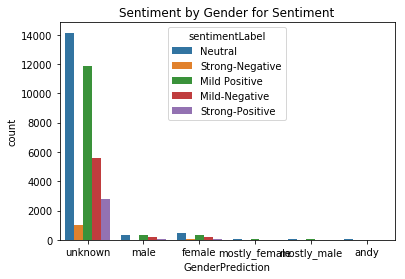

In [10]:
sns.countplot(x="GenderPrediction", hue="sentimentLabel", data=df)
plt.title("Sentiment by Gender for Sentiment")

##### Analysis:
In our March sentiment analysis piece, we can see that the majority of the tweets are Mild Positive, excluding Neutral. These tweets come from the all of the tweets recorded in the JSON file (37,000+).